### EDA (Exploratory Data Analysis)

El siguiente EDA se basa en el ETL realizado previamente sobre los datasets considerados para el analisis. El objetivo es analizar el sector de telecomunicaciones argentino en torno al servicio de internet, con el fin de orientar a una empresa en brindar una buena calidad de sus servicios, identificar oportunidades de crecimiento y plantear soluciones personalizadas a sus posibles clientes.

En primer lugar, se procede a analizar la evolucion del internet para las distintas provincias a lo largo de los años.

In [1]:
# Se importan bibliotecas de interes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
# Se carga dataset
df1 = pd.read_csv('Penetración_por_hogares_por_habitantes(ETL).csv')
df1.sort_values(['Año', 'Trimestre'], ascending=[True, True], inplace=True)
df1.head()

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
34,2014,1,49.55,15.05,14-T1
33,2014,2,49.86,15.16,14-T2
32,2014,3,50.67,15.43,14-T3
31,2014,4,50.50,15.39,14-T4
30,2015,1,51.36,15.68,15-T1


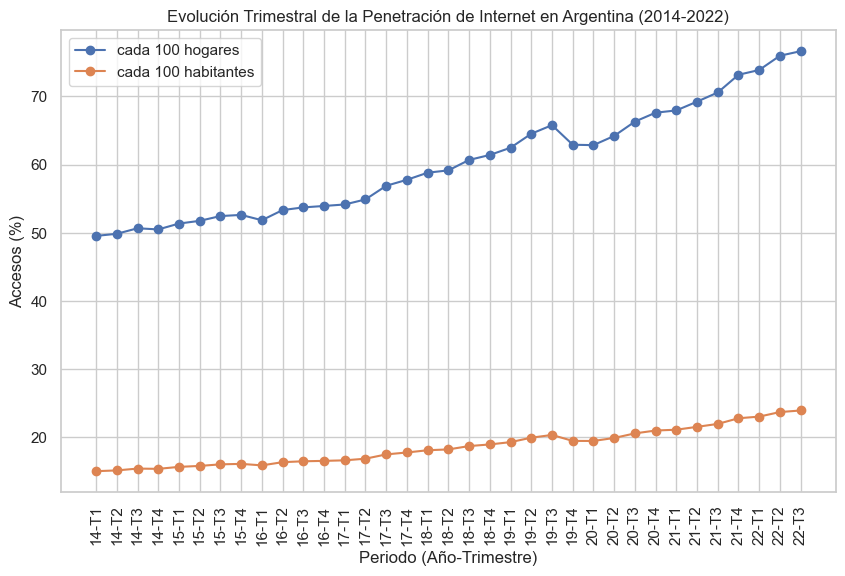

In [58]:
import matplotlib.pyplot as plt

# Datos
periodo = df1['Periodo']
accesos_hogares = df1['Accesos por cada 100 hogares']
accesos_hab = df1['Accesos por cada 100 hab']

# Configuración del gráfico
plt.figure(figsize=(10, 6))
plt.plot(periodo, accesos_hogares, label='cada 100 hogares', marker='o')
plt.plot(periodo, accesos_hab, label='cada 100 habitantes', marker='o')

# Configuración adicional
plt.title('Evolución Trimestral de la Penetración de Internet en Argentina (2014-2022)')
plt.xlabel('Periodo (Año-Trimestre)')
plt.ylabel('Accesos (%)')
plt.xticks(rotation=90)
plt.grid(True)
plt.legend()
# Mostrar el gráfico
plt.show()


A partir de este gráfico podemos concluir para el servicio de Internet en Argentina que:
* se observa un crecimiento de la penetración de Internet en hogares alcanzando en el tercer trimestre del 2022 un máximo de 76,6 %  (1,54 veces de aumento respecto al 2014). Es decir, un promedio de crecimiento anual de aprox. 6 %.
* se observa un crecimiento sostenido del acceso a Internet por cada 100 habitantes de 24 % (1,6 veces de aumento respecto al 2014). Es decir, un promedio de crecimiento anual de aprox. 6,6 %.
  
Según datos publicados en https://es.statista.com/estadisticas/598732/hogares-con-acceso-a-internet-en-el-mundo-por-region/ y actualizados al año 2021, en cuanto a accesos cada 100 hogares, Argentina se encontraría por debajo del valor promedio para el continente americano (81,4 %), mientras que el promedio más alto lo registra el continente europeo (87,5 %).
Respecto a los accesos por cada 100 habitantes, datos arrojados por el Banco Mundial (https://datos.bancomundial.org/indicator/IT.NET.BBND.P2) para el año 2021, establece un promedio mundial de 16,9 %, por lo que Argentina se encuentra por encima de dicho valor. 

A continuación se decide relacionar accesos por cada 110 hogares y 100 habitantes:

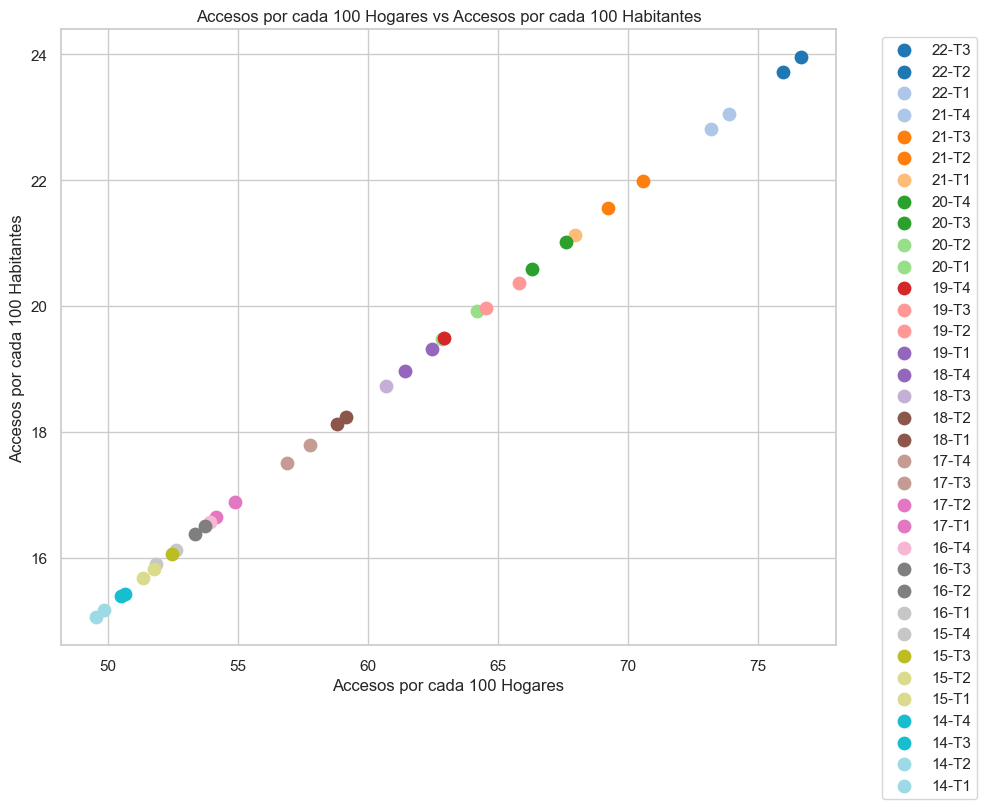

In [66]:
import matplotlib.pyplot as plt
import numpy as np

# Datos
accesos_hogares = df1['Accesos por cada 100 hogares']
accesos_hab = df1['Accesos por cada 100 hab']
periodo = df1['Periodo']

# Obtener trimestres únicos en orden descendente
trimestres_unicos = np.unique(periodo)[::-1]

# Generar colores únicos para cada trimestre
colores = plt.cm.tab20(np.linspace(0, 1, len(trimestres_unicos)))

# Configuración del gráfico
plt.figure(figsize=(10, 8))

# Iterar sobre cada trimestre y asignarle un color único
for i, trimestre in enumerate(trimestres_unicos):
    indices_trimestre = periodo == trimestre
    plt.scatter(accesos_hogares[indices_trimestre], accesos_hab[indices_trimestre], color=colores[i], label=trimestre, s=4*20)

# Configuración adicional
plt.title('Accesos por cada 100 Hogares vs Accesos por cada 100 Habitantes')
plt.xlabel('Accesos por cada 100 Hogares')
plt.ylabel('Accesos por cada 100 Habitantes')
plt.grid(True)

# Mostrar la leyenda fuera del gráfico
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.show()


A partir de este gráfico podemos concluir de que existe una correlación entre la cantidad de accesos a Internet fijo por hogares que, en parte se ve reflejada por los accesos a Internet fijo por habitantes. En base a los trimestres evaluados en estos 9 años, tambien se puede observar que la relación de accesos por cada 100 hogares vs habitantes es de aprox. 3:1. 

Con base en estos datos generales, procedemos a desglosar el análisis para examinar la distribución y evolución de la penetración de Internet por provincia:

In [71]:
# Se carga dataset
df = pd.read_csv('Penetración_por_hogares_nacional_Internet_fijo(ETL).csv')
df.sort_values(['Año', 'Trimestre'], ascending=[True, True], inplace=True)
df

,Año,Trimestre,Provincia,internet_hogares_porcentual,Periodo
816,2014,1,Buenos Aires,54.57,14-T1
817,2014,1,Capital Federal,112.25,14-T1
818,2014,1,Catamarca,24.25,14-T1
819,2014,1,Chaco,20.72,14-T1
820,2014,1,Chubut,41.24,14-T1
...,...,...,...,...,...
19,2022,3,Santa Cruz,43.19,22-T3
20,2022,3,Santa Fe,78.55,22-T3
21,2022,3,Santiago Del Estero,47.98,22-T3
22,2022,3,Tierra Del Fuego,99.51,22-T3


C:\Users\David\AppData\Local\Temp\ipykernel_12320\2114656976.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colores = plt.cm.get_cmap('tab20', num_provincias)
C:\Users\David\AppData\Local\Temp\ipykernel_12320\2114656976.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


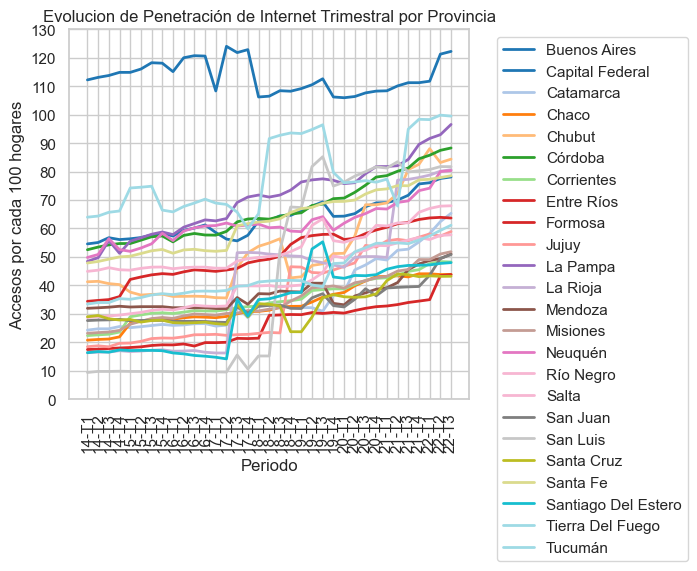

<Figure size 1200x600 with 0 Axes>

In [72]:
import math
# Se crea una figura y un eje
fig, ax = plt.subplots()

# Se obtiene la lista de provincias únicas
provincias = df['Provincia'].unique()
num_provincias = len(provincias)
# Se genera una paleta de colores única
colores = plt.cm.get_cmap('tab20', num_provincias)

# Se itera sobre cada provincia para graficar la línea correspondiente
for i, provincia in enumerate(provincias):
    data_provincia = df[df['Provincia'] == provincia]
    periodo = data_provincia['Periodo']
    accesos = data_provincia['internet_hogares_porcentual']
    ax.plot(periodo, accesos, label=provincia, linewidth=2, color=colores(i))

# Se establecen etiquetas y título del gráfico
ax.set_xlabel('Periodo')
ax.set_ylabel('Accesos por cada 100 hogares')
ax.set_title('Evolucion de Penetración de Internet Trimestral por Provincia')

# Se corrigen parámetros del gráfico
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.subplots_adjust(right=0.75)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
max_value = math.ceil(max(df['internet_hogares_porcentual']))
ax.set_yticks(range(0, int(max_value) + 10, 10))

# Se redimensiona el gráfico
fig = plt.figure(figsize=(12, 6))
plt.tight_layout(w_pad=18)
# Se muestra el gráfico
plt.show()


Del grafico anterior se puede distinguir una marcada diferencia de penetracion de Internet en CABA respecto al resto del pais, superando el 100%, lo que se podria atribuir a mas de un acceso por vivienda declarada (redundancia debido a la contratacion de mas de un servicio por ejemplo, por poseer negocio y vivienda en el mismo domicilio, o por la presencia de conglomerados habitacionales como edificios, consorcios, etc.).
Para tener una vision mas clara, a continuacion se decide explorar los datos agrupando por promedio anual para cada provincia.

C:\Users\David\AppData\Local\Temp\ipykernel_12320\1826092690.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colores = plt.cm.get_cmap('tab20', num_provincias)
C:\Users\David\AppData\Local\Temp\ipykernel_12320\1826092690.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


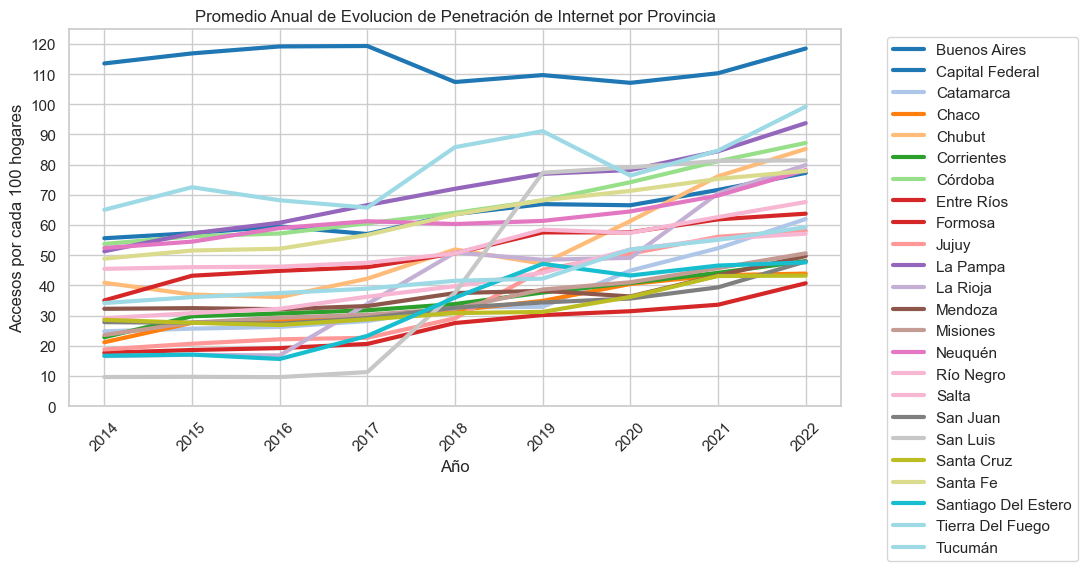

In [73]:
import matplotlib.pyplot as plt

# Agrupar los datos por 'Provincia' y 'Año' y calcular el promedio
df_grouped = df.groupby(['Provincia', 'Año'])['internet_hogares_porcentual'].mean().reset_index()

# Se crea una figura y un eje
fig, ax = plt.subplots(figsize=(12, 6))

# Se obtiene la lista de provincias únicas
provincias = df_grouped['Provincia'].unique()
num_provincias = len(provincias)
# Se genera una paleta de colores única
colores = plt.cm.get_cmap('tab20', num_provincias)

# Se itera sobre cada provincia para graficar la línea correspondiente
for i, provincia in enumerate(provincias):
    data_provincia = df_grouped[df_grouped['Provincia'] == provincia]
    periodo = data_provincia['Año']
    accesos = data_provincia['internet_hogares_porcentual']
    ax.plot(periodo, accesos, label=provincia, linewidth=3, color=colores(i))

# Se establecen etiquetas y título del gráfico
ax.set_xlabel('Año')
ax.set_ylabel('Accesos por cada 100 hogares')
ax.set_title('Promedio Anual de Evolucion de Penetración de Internet por Provincia')

# Se corrigen parámetros del gráfico
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.subplots_adjust(right=0.75)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
max_value = math.ceil(max(df_grouped['internet_hogares_porcentual']))
ax.set_yticks(range(0, int(max_value) + 10, 10))

# Se redimensiona el gráfico
plt.tight_layout(pad=4)

# Se muestra el gráfico
plt.show()


En general, se puede observar una tendencia en aumento para todas las provincias, con excepción de CABA que ha tenido una penetración relativamente constante en los 9 años evaluados (la fluctuación no es significativa). Un caso particular corresponde a San Luis, que tuvo un crecimiento abrupto a partir del año 2018, pasando de estar en la última posición al percentilo 75 en 5 años; fenómeno que se explica por la implementación de políticas públicas orientadas a fomentar la conectividad (https://agenciasanluis.com/notas/2018/01/29/distinguen-internacionalmente-las-politicas-tecnologicas-de-san-luis/). 

Asimismo, los datos recabados en el análisis global de todas las 24 jurisdicciones, coinciden con los publicados por otras fuentes, como por ejemplo:https://www.infobae.com/new-resizer/iXBaf991XIGU7Oo6hy9I6ktweIo=/filters:format(webp):quality(85)/s3.amazonaws.com/arc-wordpress-client-uploads/infobae-wp/wp-content/uploads/2019/05/16174805/Conectividad-America-Latina-Infografia.gif. Según información recopilada por Cabase, con datos de la ITU, la penetración en los hogares es del 63,8%, la más alta de la región, seguido por 61,8% en Uruguay y Chile con 61,1%. 
Para tener una vision mas clara del contexto en Argentina, a continuacion se decide explorar los datos agrupando por regiones economicas teniendo en cuenta los promedios anuales de penetración de Internet para cada provincia.

C:\Users\David\AppData\Local\Temp\ipykernel_12320\2905634433.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colores = plt.cm.get_cmap('tab20', len(regiones))
C:\Users\David\AppData\Local\Temp\ipykernel_12320\2905634433.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)


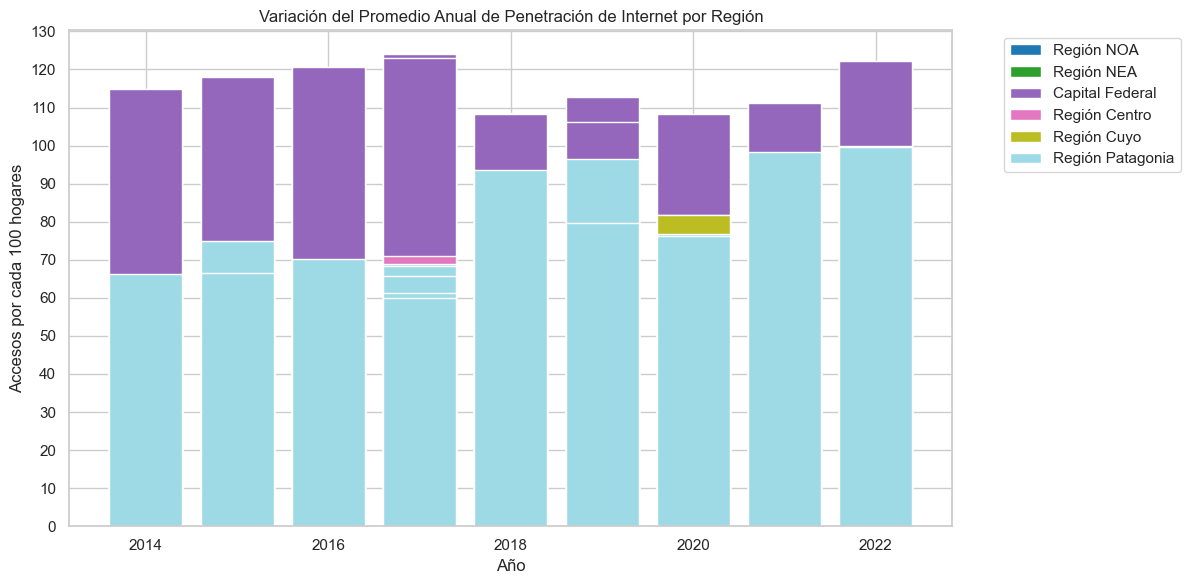

In [87]:
import math
# Se crea una figura y un eje
fig, ax = plt.subplots(figsize=(12, 6))

# Se definen las regiones y los colores correspondientes
regiones = {
    'Región NOA': ['Santiago Del Estero', 'Tucumán', 'Catamarca', 'Jujuy', 'Salta'],
    'Región NEA': ['Chaco', 'Corrientes', 'Formosa', 'Misiones'],
    'Capital Federal': ['Capital Federal'],
    'Región Centro': ['Santa Fe', 'Córdoba', 'Entre Ríos', 'Buenos Aires', 'La Pampa'],
    'Región Cuyo': ['La Rioja', 'Mendoza', 'San Juan', 'San Luis'],
    'Región Patagonia': ['Neuquén', 'Rio Negro', 'Chubut', 'Santa Cruz', 'Tierra Del Fuego']
}

# Se genera una paleta de colores única para las regiones
colores = plt.cm.get_cmap('tab20', len(regiones))

# Se itera sobre cada región y las provincias correspondientes para graficar las barras
for i, (region, provincias_region) in enumerate(regiones.items()):
    data_region = df[df['Provincia'].isin(provincias_region)]
    años = data_region['Año']
    accesos = data_region['internet_hogares_porcentual']
    ax.bar(años, accesos, label=region, color=colores(i))

# Se establecen etiquetas y título del gráfico
ax.set_xlabel('Año')
ax.set_ylabel('Accesos por cada 100 hogares')
ax.set_title('Variación del Promedio Anual de Penetración de Internet por Región')

# Se corrigen parámetros del gráfico
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.subplots_adjust(right=0.75)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
max_value = math.ceil(max(df['internet_hogares_porcentual']))
ax.set_yticks(range(0, int(max_value) + 10, 10))

# Se redimensiona el gráfico
plt.tight_layout(w_pad=18)

# Se muestra el gráfico
plt.show()


A continuacion se desglosa este mismo grafico, mostrando la evolucion por cada region.

C:\Users\David\AppData\Local\Temp\ipykernel_12320\389184805.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colores = plt.cm.get_cmap('tab20', len(regiones))


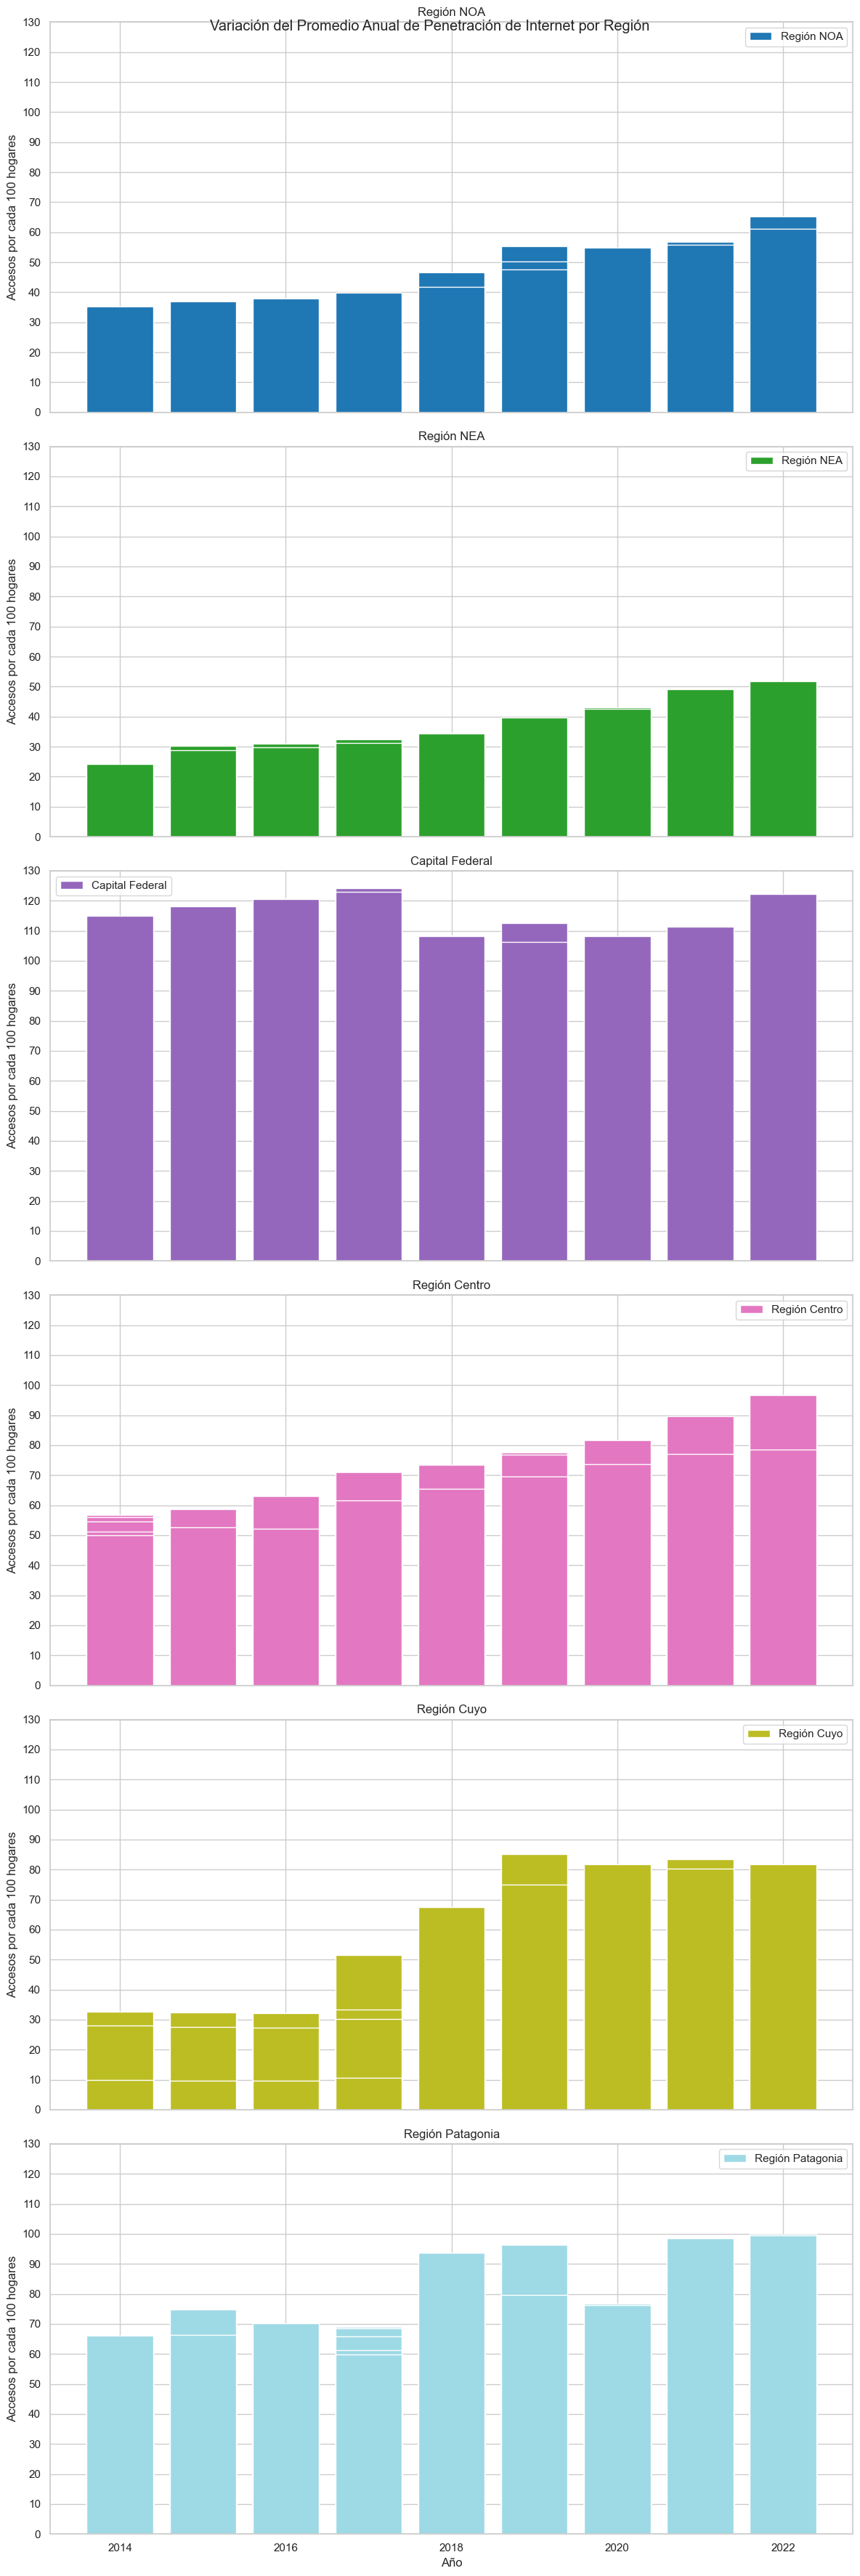

In [88]:
import math
import matplotlib.ticker as ticker
# Se obtienen las regiones y las provincias correspondientes
regiones = {
    'Región NOA': ['Santiago Del Estero', 'Tucumán', 'Catamarca', 'Jujuy', 'Salta'],
    'Región NEA': ['Chaco', 'Corrientes', 'Formosa', 'Misiones'],
    'Capital Federal': ['Capital Federal'],
    'Región Centro': ['Santa Fe', 'Córdoba', 'Entre Ríos', 'Buenos Aires', 'La Pampa'],
    'Región Cuyo': ['La Rioja', 'Mendoza', 'San Juan', 'San Luis'],
    'Región Patagonia': ['Neuquén', 'Río Negro', 'Chubut', 'Santa Cruz', 'Tierra Del Fuego']
}

# Se genera una paleta de colores única para las regiones
colores = plt.cm.get_cmap('tab20', len(regiones))

# Se calcula el número total de regiones
num_regiones = len(regiones)

# Se define el tamaño de la figura en función del número de regiones
fig, axs = plt.subplots(num_regiones, 1, figsize=(12, 6*num_regiones), sharex=True)

# Se itera sobre cada región y se grafica la barra correspondiente
for i, (region, provincias_region) in enumerate(regiones.items()):
    data_region = df[df['Provincia'].isin(provincias_region)]
    años = data_region['Año']
    accesos = data_region['internet_hogares_porcentual']
    axs[i].bar(años, accesos, label=region, color=colores(i))
    axs[i].set_ylabel('Accesos por cada 100 hogares')
    axs[i].set_title(region)
    axs[i].legend()
    axs[i].set_ylim(0, 130)
    axs[i].yaxis.set_major_locator(ticker.MultipleLocator(10))


# Se establecen las etiquetas del eje x y el título del gráfico
axs[-1].set_xlabel('Año')
plt.suptitle('Variación del Promedio Anual de Penetración de Internet por Región')

# Se ajusta el espaciado entre subgráficos
plt.tight_layout()

# Se muestra el gráfico
plt.show()


Como se puede apreciar las regiones NEA y NOA son las que presentan una menor penetración de Internet a comienzos del 2014 (menor al 30% para NEA y menor al 40% para NOA) aumentando paulatinamente hasta el 2022. Cabe destacar que el crecimiento pronunciado en Cuyo se debe a una tracción del abrupto aumento descripto anteriormente en la provincia de San Luis. 
Las regiones Centro y Patagonia presentan una dinámica similar a lo largo de los años consiguiendo valores cercanos al 100 %, mientras que en Capital Federal se mantuvo estable el acceso a Internet por encima de 110% en los 9 años evaluados. 
 

Teniendo en cuenta estos datos, se procede al analisis del tipo de internet al que acceden en las distintas provincias, arrojando los siguientes resultados:

In [8]:
df7 = pd.read_csv('Serie_trimestral_accesos_Internet_fijo_por_tecnología(ETL).csv')
df7.sort_values(['Año', 'Trimestre'], ascending=[True, True], inplace=True)
df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 34 to 0
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           35 non-null     int64 
 1   Trimestre     35 non-null     int64 
 2   ADSL          35 non-null     int64 
 3   Cablemodem    35 non-null     int64 
 4   Fibra óptica  35 non-null     int64 
 5   Wireless      35 non-null     int64 
 6   Otros         35 non-null     int64 
 7   Total         35 non-null     int64 
 8   Periodo       35 non-null     object
dtypes: int64(8), object(1)
memory usage: 2.7+ KB


C:\Users\David\AppData\Local\Temp\ipykernel_12320\553735237.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['ADSL_pct'] = (df_filtered['ADSL'] / df_filtered['Total']) * 100


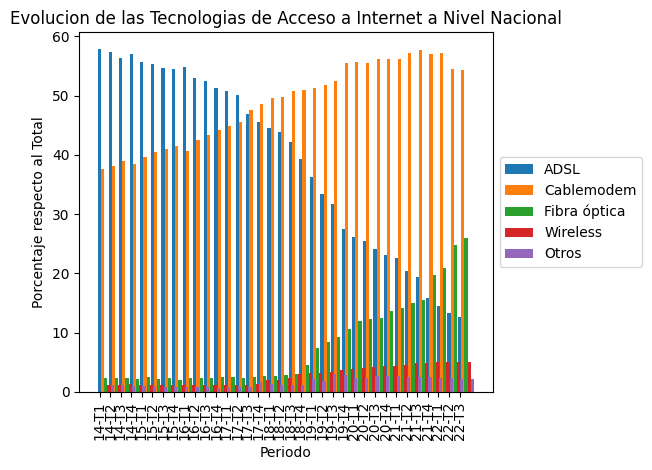

In [9]:
import matplotlib.pyplot as plt

# Filtrar las columnas necesarias
df_filtered = df7[['Periodo', 'ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros', 'Total']]

# Calcular el porcentaje respecto al campo 'Total'
df_filtered['ADSL_pct'] = (df_filtered['ADSL'] / df_filtered['Total']) * 100
df_filtered['Cablemodem_pct'] = (df_filtered['Cablemodem'] / df_filtered['Total']) * 100
df_filtered['Fibra óptica_pct'] = (df_filtered['Fibra óptica'] / df_filtered['Total']) * 100
df_filtered['Wireless_pct'] = (df_filtered['Wireless'] / df_filtered['Total']) * 100
df_filtered['Otros_pct'] = (df_filtered['Otros'] / df_filtered['Total']) * 100

# Configurar los datos para el gráfico
periodos = df_filtered['Periodo']
adsl_pct = df_filtered['ADSL_pct']
cablemodem_pct = df_filtered['Cablemodem_pct']
fibra_optica_pct = df_filtered['Fibra óptica_pct']
wireless_pct = df_filtered['Wireless_pct']
otros_pct = df_filtered['Otros_pct']

# Crear una figura y un eje
fig, ax = plt.subplots()

# Generar las barras para cada tipo de internet
width = 0.3
x = range(len(periodos))
ax.bar(x, adsl_pct, width=width, label='ADSL')
ax.bar([i + width for i in x], cablemodem_pct, width=width, label='Cablemodem')
ax.bar([i + 2 * width for i in x], fibra_optica_pct, width=width, label='Fibra óptica')
ax.bar([i + 3 * width for i in x], wireless_pct, width=width, label='Wireless')
ax.bar([i + 4 * width for i in x], otros_pct, width=width, label='Otros')

# Establecer etiquetas y título del gráfico
ax.set_xticks(x)
ax.set_xticklabels(periodos, rotation=90)
ax.set_xlabel('Periodo')
ax.set_ylabel('Porcentaje respecto al Total')
ax.set_title('Evolucion de las Tecnologias de Acceso a Internet a Nivel Nacional')

# Añadir leyenda fuera del gráfico
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Ajustar el espaciado entre las barras
plt.tight_layout()

# Mostrar el gráfico
plt.show()


Si bien se pueden observar marcadas diferencias en la evolucion de tipo de tecnologia de acceso a Internet, con el fin de darle mayor claridad, se procede a la visualizacion en grafico tipo barras apiladas:

C:\Users\David\AppData\Local\Temp\ipykernel_12320\3205246291.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_7['ADSL'] = (df_7['ADSL'] / df_7['Total']) * 100
C:\Users\David\AppData\Local\Temp\ipykernel_12320\3205246291.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_7['Cablemodem'] = (df_7['Cablemodem'] / df_7['Total']) * 100
C:\Users\David\AppData\Local\Temp\ipykernel_12320\3205246291.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

<Figure size 1000x600 with 0 Axes>

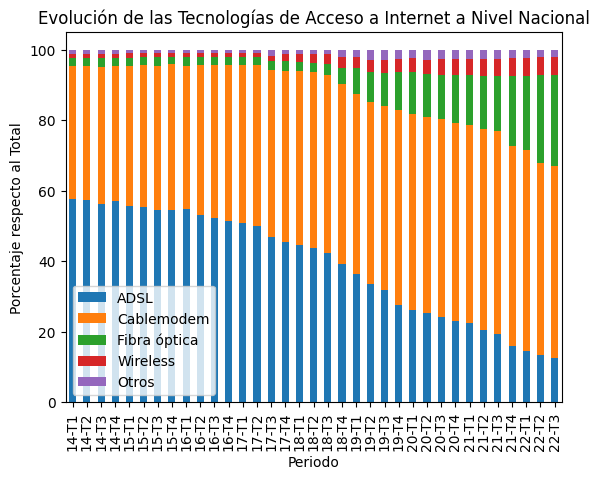

In [10]:
# Se filtran las columnas necesarias
df_7 = df7[['Periodo', 'ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros', 'Total']]

# Se calcula el porcentaje respecto al campo 'Total'
df_7['ADSL'] = (df_7['ADSL'] / df_7['Total']) * 100
df_7['Cablemodem'] = (df_7['Cablemodem'] / df_7['Total']) * 100
df_7['Fibra óptica'] = (df_7['Fibra óptica'] / df_7['Total']) * 100
df_7['Wireless'] = (df_7['Wireless'] / df_7['Total']) * 100
df_7['Otros'] = (df_7['Otros'] / df_7['Total']) * 100

# Se configuran los datos para el gráfico
data = df_7.set_index('Periodo')[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']]

# Se crea el gráfico utilizando el método .plot(kind='bar')
plt.figure(figsize=(10, 6))
data.plot(kind='bar', stacked=True)

# Se establece etiquetas y título del gráfico
plt.xticks(rotation=90)
plt.xlabel('Periodo')
plt.ylabel('Porcentaje respecto al Total')
plt.title('Evolución de las Tecnologías de Acceso a Internet a Nivel Nacional')

# Se muestra el gráfico
plt.show()


A partir del gráfico anterior se puede concluir que:
- a lo largo de estos 9 años la tecnología ADSL ha ido perdiendo preponderancia pasando de un 57,8 % en 2014 a un 12,6 % en 2022 (disminuye 4,6 veces) siendo reemplazada por otras tecnologías;
- la tecnología Cablemódem aumenta 1,45 veces en 2022 respecto al 2014 (54,4% vs 37,6% respectivamente);
- a partir del 4to trimestre del 2018 se observa un crecimiento sostenido de tecnología Fibra óptica llegando a significar el 25,9% de las tecnologías de accesos a Internet (aumenta 5,6 veces);
- la tecnología Wireless en el 3er trimestre del 2022 llega a representar el 5 % de las tecnologías de accesos a Internet;
- Otras tecnologías representan el 2 % en el 3er trimestre del 2022;


A continuacion se propone analizar la distribucion de las tecnologias para el tercer trimestre del 2022 como proyeccion de mercado:

In [11]:
df6 = pd.read_csv('Acceso_Internet_fijo_por_tecnología_y_provincia(ETL).csv')
df6.sort_values(['Año', 'Trimestre'], ascending=[True, True], inplace=True)
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 840 entries, 816 to 23
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           840 non-null    object 
 1   Trimestre     840 non-null    object 
 2   Provincia     840 non-null    object 
 3   ADSL          840 non-null    float64
 4   Cablemodem    840 non-null    float64
 5   Fibra óptica  840 non-null    float64
 6   Wireless      840 non-null    float64
 7   Otros         840 non-null    float64
 8   Total         840 non-null    float64
 9   Periodo       840 non-null    object 
dtypes: float64(6), object(4)
memory usage: 72.2+ KB


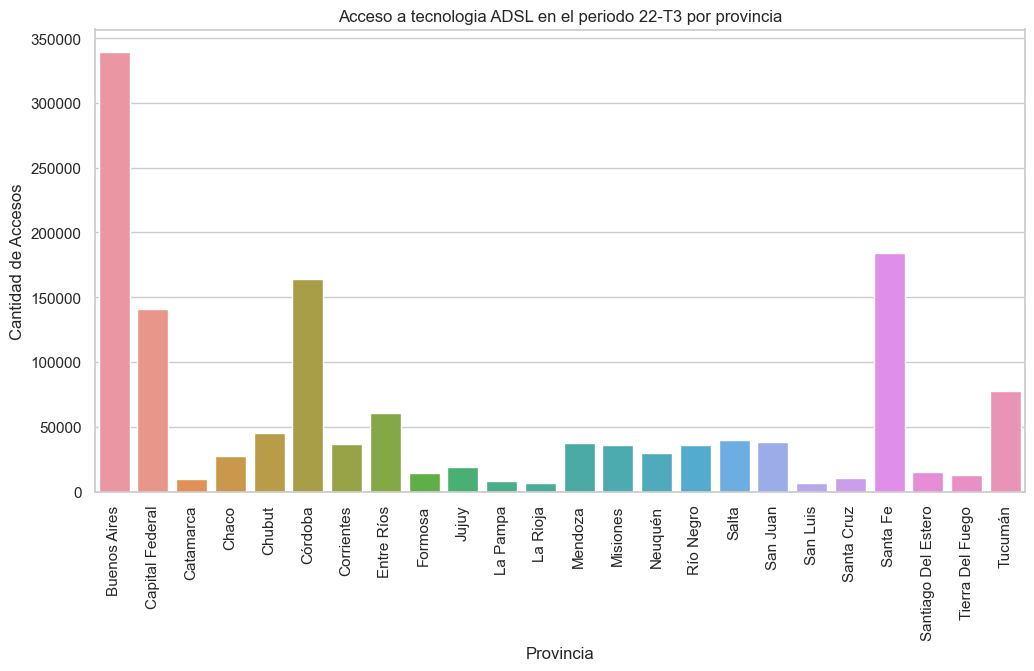

In [12]:
# Se filtra el dataframe por el periodo y campo deseado
df_filtered = df6[(df6['Periodo'] == '22-T3') & (df6['ADSL'] > 0)]

# Se crea el gráfico
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x='Provincia', y='ADSL', data=df_filtered)

plt.title("Acceso a tecnologia ADSL en el periodo 22-T3 por provincia")
plt.xlabel("Provincia")
plt.ylabel("Cantidad de Accesos")
plt.xticks(rotation=90)

plt.show()

A partir de este grafico se puede concluir que si bien a lo largo de los años hubo una disminucion marcada en su demanda, el servicio de ADSL tiene una presencia importante en diferentes provincias del pais, sobre todo en la región centro (como Buenos Aires, Córdoba y Santa Fe, además de CABA) pero también en menor medidad, en las otras regiones del país. Esto podría atribuirse en parte al relicto de una marcada presencia de compañias de telefonia fija (Telefónica/Telecom, hoy en baja), ya que el servicio ADSL se brinda a través de dicha red.

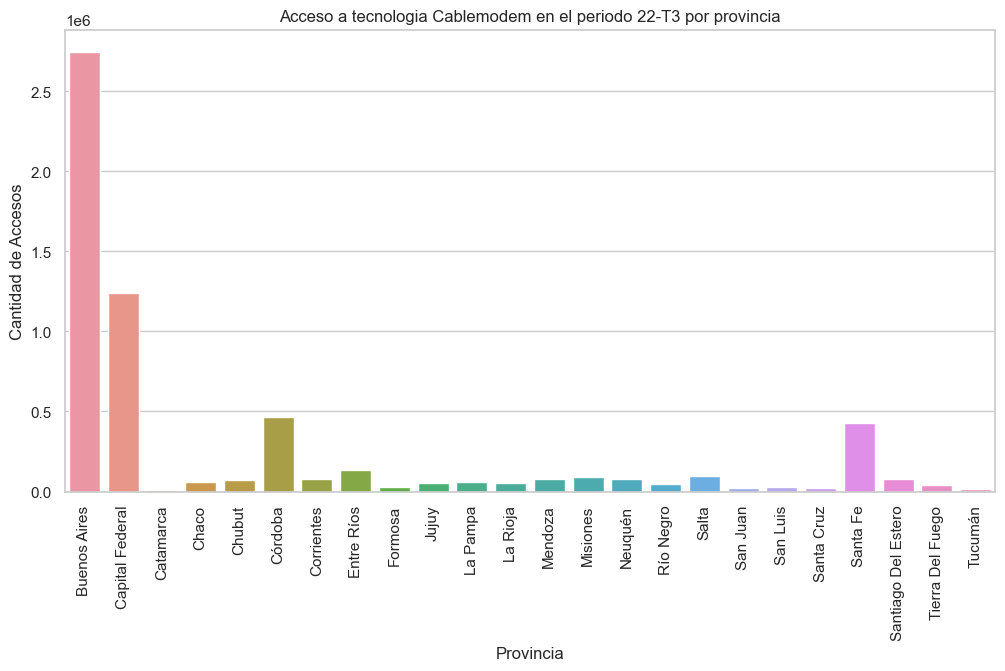

In [13]:
# Se filtra el dataframe por el periodo y campo deseado
df_filtered = df6[(df6['Periodo'] == '22-T3') & (df6['Cablemodem'] > 0)]

# Se crea el gráfico
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x='Provincia', y='Cablemodem', data=df_filtered)

plt.title("Acceso a tecnologia Cablemodem en el periodo 22-T3 por provincia")
plt.xlabel("Provincia")
plt.ylabel("Cantidad de Accesos")
plt.xticks(rotation=90)

plt.show()


A partir de este grafico se puede concluir que el servicio de Cablemódem tiene una presencia preponderante en la provincia de Buenos Aires y CABA, además de una importante presencia en las demás provincias de la región Centro como Córdoba y Santa Fe. Cabe destacar que esta modalidad de servicio es provista por las prestadoras de televisión por cable quienes poseen en su estructura de red un troncal de fibra óptica distribuyendo la señal hasta el cliente a través del mismo cable coaxial por medio del cual se presta el servicio de CATV. Estos resultados pueden explicarse en gran parte debido a la arquitectura de distribución de la red troncal de fibra óptica en el país: https://www.argentina.gob.ar/sites/default/files/mapa_refefo_dic_2021.png. Se puede observar que la mayor densidad de redes de fibra óptica para la región Centro, coincide con la mayor cantidad de accesos en dicha región. 

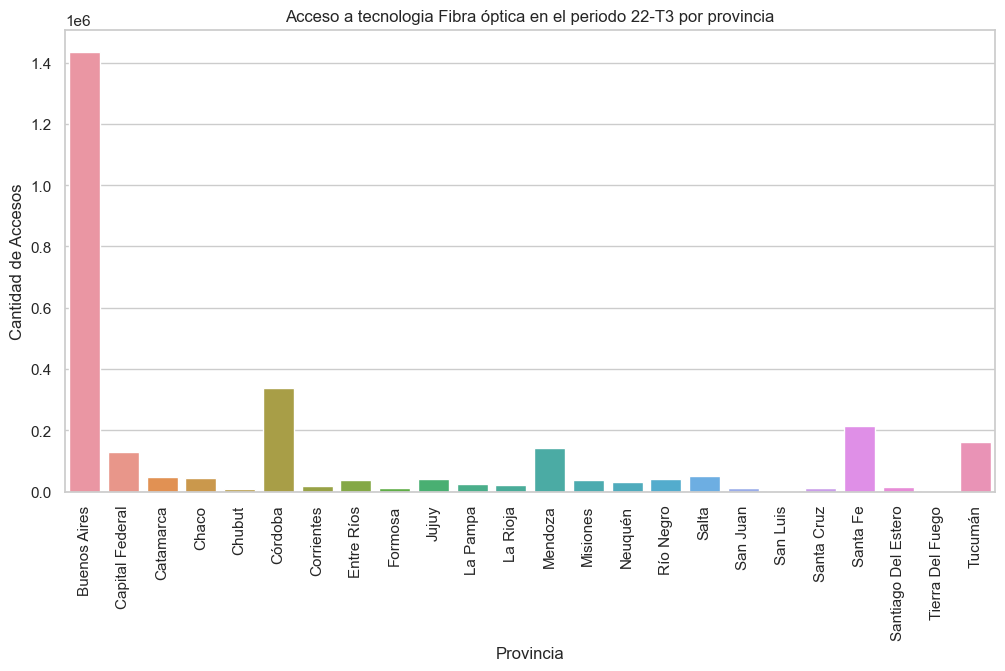

In [14]:
# Se filtra el dataframe por el periodo y campo deseado
df_filtered = df6[(df6['Periodo'] == '22-T3') & (df6['Fibra óptica'] > 0)]

# Se crea el gráfico
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x='Provincia', y='Fibra óptica', data=df_filtered)

plt.title("Acceso a tecnologia Fibra óptica en el periodo 22-T3 por provincia")
plt.xlabel("Provincia")
plt.ylabel("Cantidad de Accesos")
plt.xticks(rotation=90)

plt.show()

Se observa que, exceptuando CABA, la Fibra óptica es la tecnología con mayor auge en aquellas provincias que poseen los centros urbanos más grandes del país y por ende mayor concentración de usuarios (Buenos Aires, Córdoba, Santa Fe, Mendoza, Tucumán, etc.). Esto puede deberse a que si bien la Fibra óptica, tiene un costo de inversión inicial considerable, se presenta como la tecnología que tiene mejor relación calidad de servicio/precio. La siguiente información respecto al mapa de cobertura actual de la REFEFO (Red federal de Fibra Óptica) permite explicar el fenómeno anteriormente mencionado: https://www.arsat.com.ar/infraestructura-tecnologica/red-federal-de-fibra-optica/.

Además de la cobertura y el grado de alcance de las distintas tecnologías para la provisión de Internet, un dato importante a tener en cuenta es la calidad del servicio, la cual puede ser génericamente determinada en función de la velocidad de descarga. 
A continuación se procederá al análisis de la velocidad promedio de descarga para las distintas provincias y/o regiones de Argentina. 

In [15]:
df8= pd.read_csv('Velocidad_media_bajada_Internet_fijo_por_provincia(ETL).csv')
df8.sort_values(['Año', 'Trimestre'], ascending=[True, True], inplace=True)
df8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 840 entries, 816 to 23
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Año                     840 non-null    int64 
 1   Trimestre               840 non-null    int64 
 2   Provincia               840 non-null    object
 3   Mbps (Media de bajada)  840 non-null    int64 
 4   Periodo                 840 non-null    object
dtypes: int64(3), object(2)
memory usage: 39.4+ KB


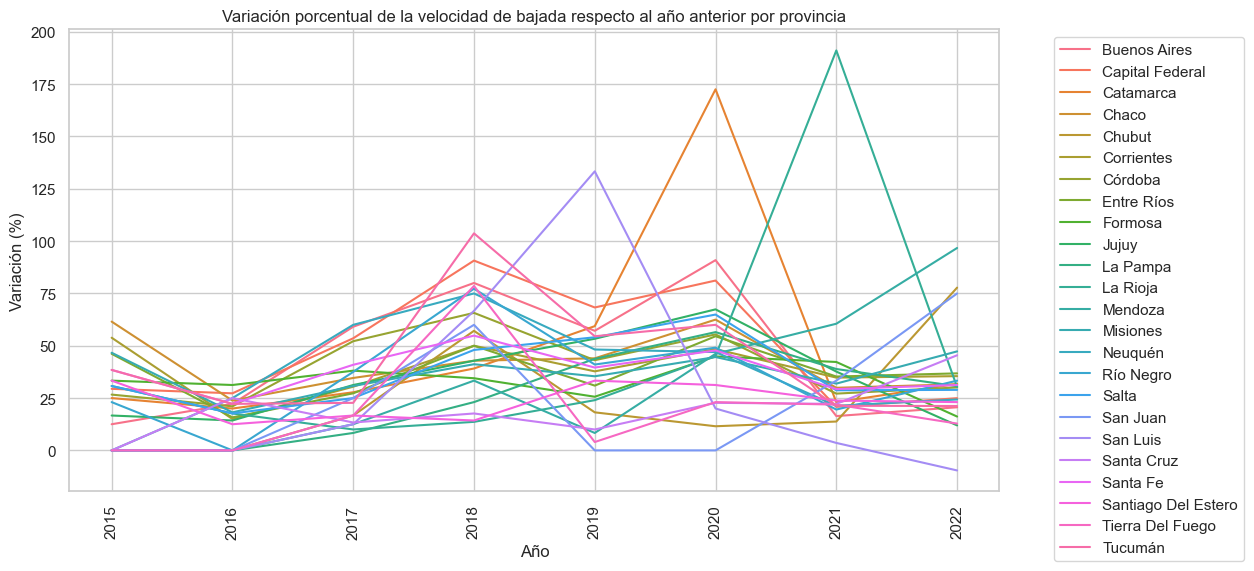

In [16]:

# Calcular el promedio de Mbps por año y provincia
df8_avg = df8.groupby(['Año', 'Provincia'])['Mbps (Media de bajada)'].mean().reset_index()

# Calcular el porcentaje de variación respecto al año anterior por provincia
df8_avg['Variacion'] = df8_avg.groupby('Provincia')['Mbps (Media de bajada)'].pct_change() * 100

# Crear el gráfico
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
ax = sns.lineplot(x='Año', y='Variacion', hue='Provincia', data=df8_avg)

plt.title("Variación porcentual de la velocidad de bajada respecto al año anterior por provincia")
plt.xlabel("Año")
plt.ylabel("Variación (%)")
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


Para obtener una perspectiva más clara de esta variable, se propone calcular un índice de variación de velocidad como el cociente porcentual entre la diferencia de los años 2022-2014 con respecto al año 2014.

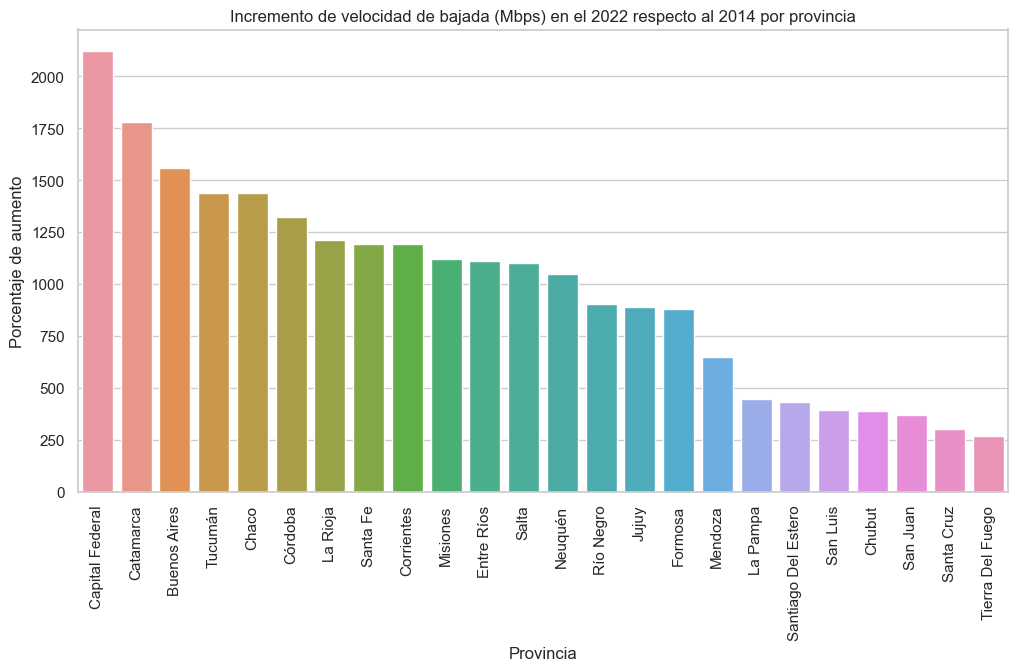

In [89]:
# Se filtra los datos para el año 2014 y el año 2022
df_filtered = df8[(df8['Año'] == 2014) | (df8['Año'] == 2022)]

# Se calcula el promedio de Mbps por año y provincia
df_avg = df_filtered.groupby(['Año', 'Provincia'])['Mbps (Media de bajada)'].mean().reset_index()

# Se pivotea el dataframe para tener los años como columnas
df_pivot = df_avg.pivot(index='Provincia', columns='Año', values='Mbps (Media de bajada)')

# Se calcula el porcentaje de variación del año 2022 respecto al año 2014
df_pivot['Variacion'] = ((df_pivot[2022] - df_pivot[2014]) / df_pivot[2014]) * 100

# Se ordenan los datos por la variación en orden descendente
df_sorted = df_pivot.sort_values(by='Variacion', ascending=False)

# Se crea el gráfico
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=df_sorted.index, y='Variacion', data=df_sorted)

plt.title("Incremento de velocidad de bajada (Mbps) en el 2022 respecto al 2014 por provincia")
plt.xlabel("Provincia")
plt.ylabel("Porcentaje de aumento")
plt.xticks(rotation=90)

plt.show()


Lidera la tabla Capital Federal con incremento en la velocidad de bajada en el 2022 respecto al 2014 por encima de 2500 %, seguida de Catamarca y Buenos Aires (1750 y 1500 % respectivamente). La provincia de Neuquén representa la mediana con un índice de aprox. 1000 %, mientras que Santa Cruz y Tierra del Fuego son las provincias que se encuentran más rezagadas con un índice de alrededor 250 %.
A continuación se muestra la velocidad media de bajada registrada en el último período registrado correspondiente al tercer trimestre del 2022:

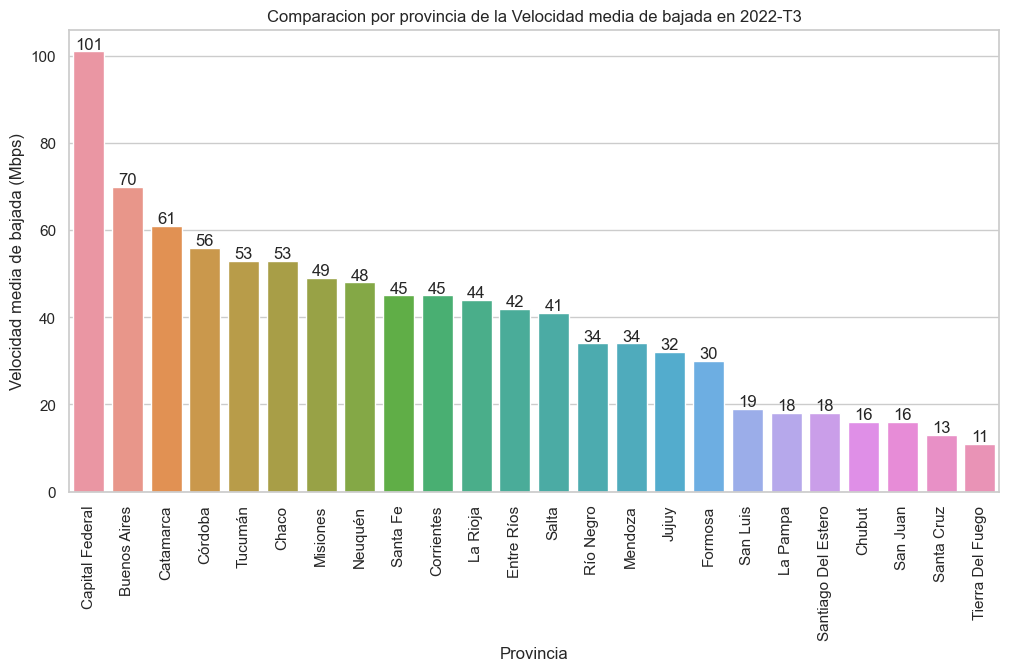

In [90]:
# Se filtran los datos para el periodo '22-T3'
df_filtered = df8[df8['Periodo'] == '22-T3']

# Se calcula el valor promedio de 'Mbps (Media de bajada)' para cada provincia en el periodo '22-T3'
df_avg = df_filtered.groupby('Provincia')['Mbps (Media de bajada)'].mean().reset_index()

# Se ordenan los datos por el valor promedio en orden descendente
df_sorted = df_avg.sort_values(by='Mbps (Media de bajada)', ascending=False)

# Se crea el gráfico
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Provincia', y='Mbps (Media de bajada)', data=df_sorted)

plt.title("Comparacion por provincia de la Velocidad media de bajada en 2022-T3")
plt.xlabel("Provincia")
plt.ylabel("Velocidad media de bajada (Mbps)")
plt.xticks(rotation=90)

# Se agrega el valor promedio del campo 'Mbps (Media de bajada)' encima de cada barra
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{int(height)}", (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()


Si bien el promedio nacional de velocidad de Internet es de 39.54 Mbps, según los datos del Enacom para el tercer trimestre de 2022, esta se encuentra muy dispersa en función de las provincias teniendo a la cabeza Capital Federal con 101 Mbps y por el contrario a Tierra del Fuego con 11 Mbps. Lo cual representa una gran oportunidad de mejora.
A continuación se desea analizar el la velocidad media de bajada reagrupando a las provincias por regiones económicas:

C:\Users\David\AppData\Local\Temp\ipykernel_12320\3815390327.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colores = plt.cm.get_cmap('tab20', len(regiones))
C:\Users\David\AppData\Local\Temp\ipykernel_12320\3815390327.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


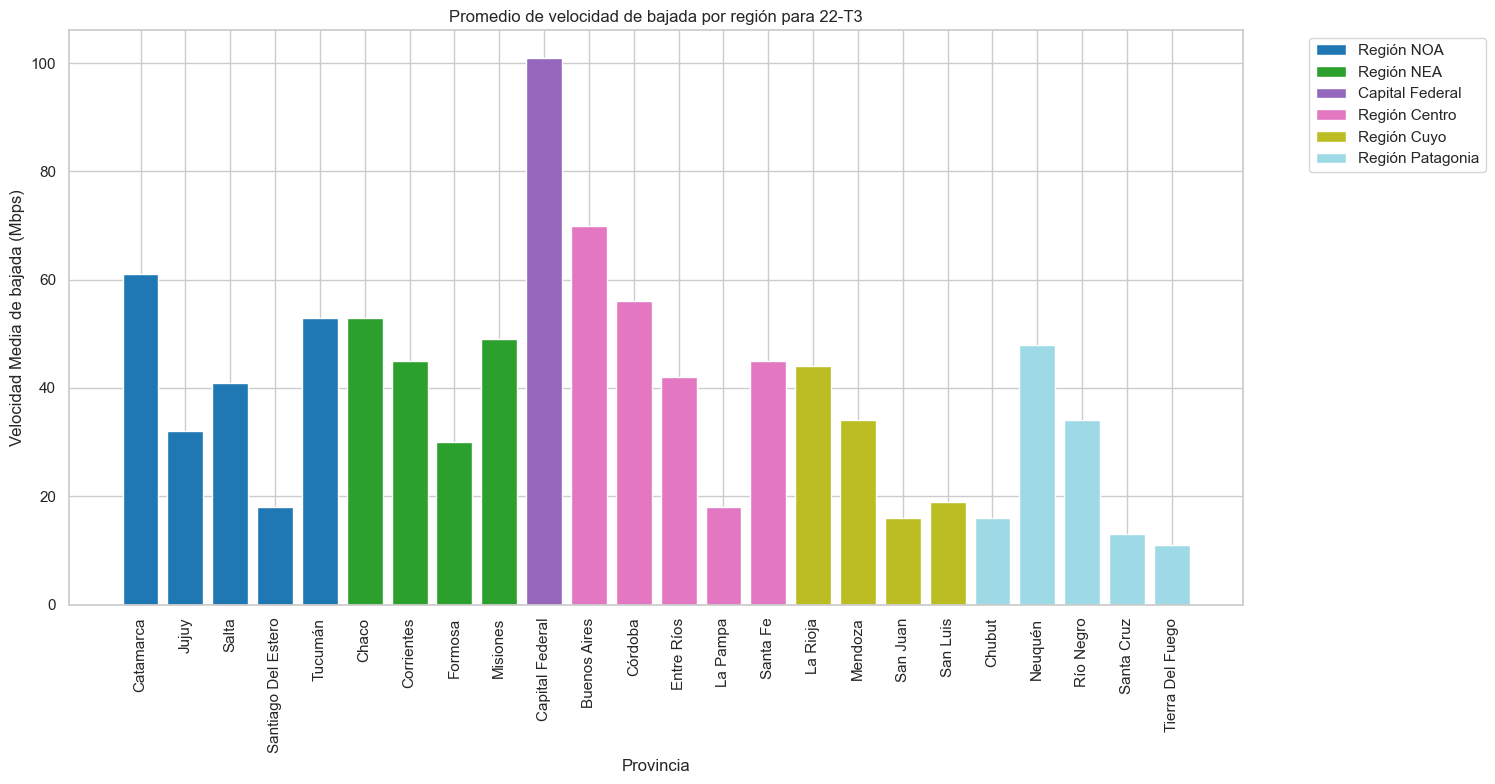

In [34]:
import math

# Se crea una figura y un eje
fig, ax = plt.subplots(figsize=(15, 8))

# Se definen las regiones y los colores correspondientes
regiones = {
    'Región NOA': ['Santiago Del Estero', 'Tucumán', 'Catamarca', 'Jujuy', 'Salta'],
    'Región NEA': ['Chaco', 'Corrientes', 'Formosa', 'Misiones'],
    'Capital Federal': ['Capital Federal'],
    'Región Centro': ['Santa Fe', 'Córdoba', 'Entre Ríos', 'Buenos Aires', 'La Pampa'],
    'Región Cuyo': ['La Rioja', 'Mendoza', 'San Juan', 'San Luis'],
    'Región Patagonia': ['Neuquén', 'Río Negro', 'Chubut', 'Santa Cruz', 'Tierra Del Fuego']
}

# Se genera una paleta de colores única para las regiones
colores = plt.cm.get_cmap('tab20', len(regiones))

# Se itera sobre cada región y las provincias correspondientes para graficar las barras
for i, (region, provincias_region) in enumerate(regiones.items()):
    data_region = df8[(df8['Provincia'].isin(provincias_region)) & (df8['Periodo'] == '22-T3')]
    provincias = data_region['Provincia']
    velocidad_bajada = data_region['Mbps (Media de bajada)']
    ax.bar(provincias, velocidad_bajada, label=region, color=colores(i))

# Se establecen etiquetas y título del gráfico
ax.set_xlabel('Provincia')
ax.set_ylabel('Velocidad Media de bajada (Mbps)')
ax.set_title('Promedio de velocidad de bajada por región para 22-T3')

# Se corrigen parámetros del gráfico
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.subplots_adjust(right=0.75)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Se redimensiona el gráfico
plt.tight_layout(w_pad=22)

# Se muestra el gráfico
plt.show()


Si bien hay una disperción intergrupo, resulta intereante poder obtener un valor promedio por región:

C:\Users\David\AppData\Local\Temp\ipykernel_12320\2570767324.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colores = plt.cm.get_cmap('tab20', len(regiones))


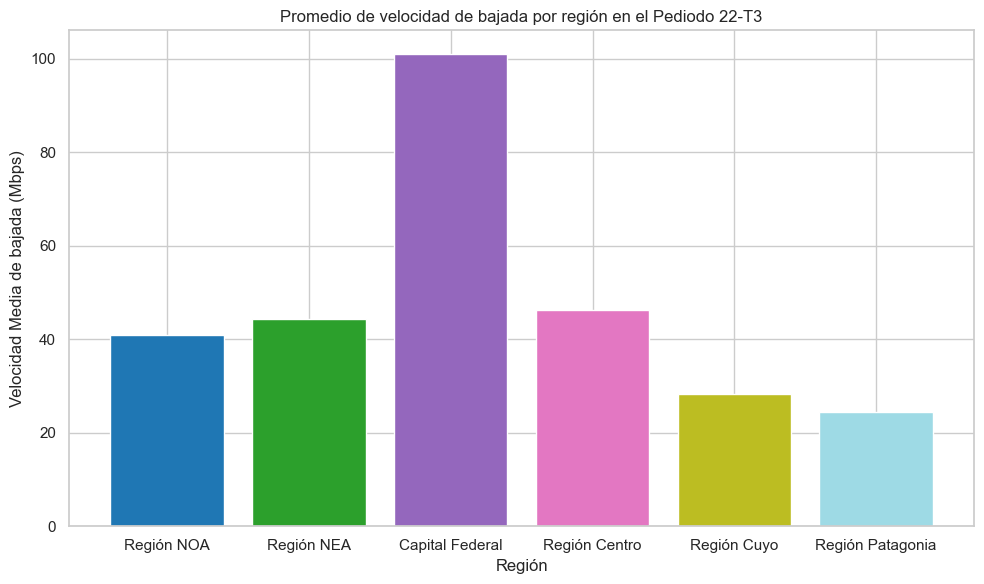

In [35]:
import math

# Se crea una figura y un eje
fig, ax = plt.subplots(figsize=(10, 6))

# Se definen las regiones y los colores correspondientes
regiones = {
    'Región NOA': ['Santiago Del Estero', 'Tucumán', 'Catamarca', 'Jujuy', 'Salta'],
    'Región NEA': ['Chaco', 'Corrientes', 'Formosa', 'Misiones'],
    'Capital Federal': ['Capital Federal'],
    'Región Centro': ['Santa Fe', 'Córdoba', 'Entre Ríos', 'Buenos Aires', 'La Pampa'],
    'Región Cuyo': ['La Rioja', 'Mendoza', 'San Juan', 'San Luis'],
    'Región Patagonia': ['Neuquén', 'Río Negro', 'Chubut', 'Santa Cruz', 'Tierra Del Fuego']
}

# Se genera una paleta de colores única para las regiones
colores = plt.cm.get_cmap('tab20', len(regiones))

# Se crea una lista para almacenar las medias de velocidad de bajada por región
medias_region = []

# Se itera sobre cada región y las provincias correspondientes para obtener las medias
for i, (region, provincias_region) in enumerate(regiones.items()):
    data_region = df8[(df8['Provincia'].isin(provincias_region)) & (df8['Periodo'] == '22-T3')]
    velocidad_bajada = data_region['Mbps (Media de bajada)']
    media_region = velocidad_bajada.mean()
    medias_region.append(media_region)

# Se genera una lista de etiquetas de región
etiquetas_region = [region for region in regiones.keys()]

# Se grafican las barras de media de velocidad de bajada por región
ax.bar(etiquetas_region, medias_region, color=colores(range(len(regiones))))

# Se establecen etiquetas y título del gráfico
ax.set_xlabel('Región')
ax.set_ylabel('Velocidad Media de bajada (Mbps)')
ax.set_title('Promedio de velocidad de bajada por región en el Pediodo 22-T3')

# Se redimensiona el gráfico
plt.tight_layout()

# Se muestra el gráfico
plt.show()


Dejando fuera del análisis a CABA, en el resto del país se pueden subdividir en 2 grupos: regiones con velocidad media de bajada superior a la media nacional (39,54 Mbps), tal es el caso de la región Centro, seguida por el NEA y NOA; regiones con velocidad media de bajada inferior a la media nacional, regiones Cuyo y Patagonia. 

Otro análisis interesante resulta en la relación entre penetración y velocidad por provincia para el período más reciente registrado:


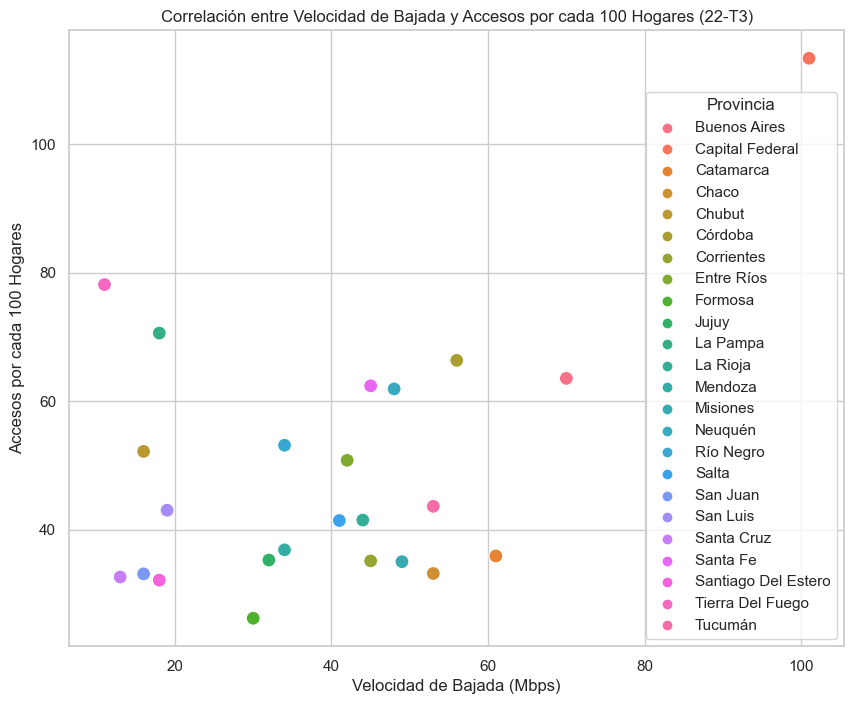

In [22]:
# Filtrar los datos para el periodo '22-T3'
df_filtered = df8[df8['Periodo'] == '22-T3']

# Calcular el promedio de accesos por cada 100 hogares para cada provincia en el periodo '22-T3'
df_accesos = df.groupby('Provincia')['internet_hogares_porcentual'].mean().reset_index()

# Unir los datos de velocidad de bajada y accesos por cada 100 hogares
df_combined = pd.merge(df_filtered, df_accesos, on='Provincia')

# Crear el gráfico de correlación
sns.set(style='whitegrid')
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Mbps (Media de bajada)', y='internet_hogares_porcentual', hue='Provincia', data=df_combined, s=100)

plt.title('Relación entre Penetración y Velocidad de Internet para cada provincia en el Periodo 22-T3')
plt.xlabel('Velocidad de Bajada (Mbps)')
plt.ylabel('Accesos por cada 100 Hogares')

plt.show()


C:\Users\David\AppData\Local\Temp\ipykernel_12320\1983257800.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colores = plt.cm.get_cmap('tab20', len(df_combined['Provincia'].unique()))


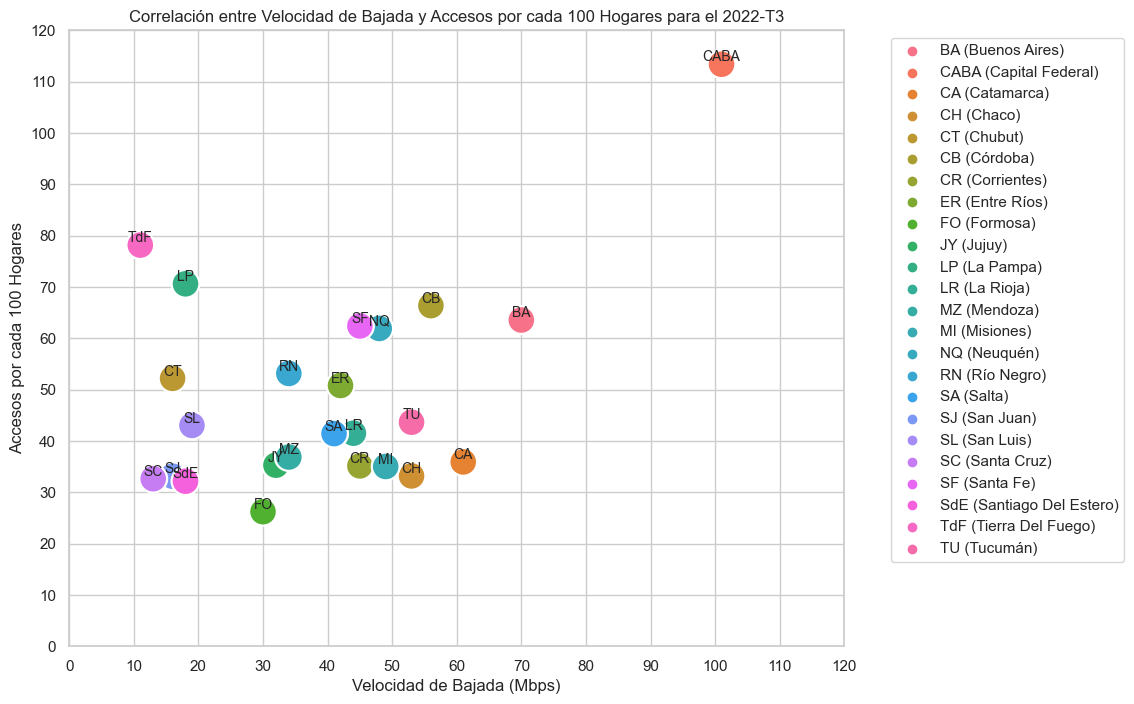

In [32]:
# Filtrar los datos para el periodo '22-T3'
df_filtered = df8[df8['Periodo'] == '22-T3']

# Calcular el promedio de accesos por cada 100 hogares para cada provincia en el periodo '22-T3'
df_accesos = df.groupby('Provincia')['internet_hogares_porcentual'].mean().reset_index()

# Unir los datos de velocidad de bajada y accesos por cada 100 hogares
df_combined = pd.merge(df_filtered, df_accesos, on='Provincia')

# Crear el gráfico de correlación
sns.set(style='whitegrid')
plt.figure(figsize=(10, 8))
ax = sns.scatterplot(x='Mbps (Media de bajada)', y='internet_hogares_porcentual', hue='Provincia', data=df_combined, s=400)

# Configurar colores intensos y únicos para cada provincia
colores = plt.cm.get_cmap('tab20', len(df_combined['Provincia'].unique()))
ax.set_prop_cycle('color', colores.colors)

plt.title('Correlación entre Velocidad de Bajada y Accesos por cada 100 Hogares para el 2022-T3')
plt.xlabel('Velocidad de Bajada (Mbps)')
plt.ylabel('Accesos por cada 100 Hogares')

# Configurar tamaño del punto
plt.scatter([], [], s=400)

provincias_abreviadas = {
    'Capital Federal': 'CABA', 'Buenos Aires': 'BA',
    'Catamarca': 'CA','Chaco': 'CH','Chubut': 'CT',
    'Córdoba': 'CB','Corrientes': 'CR','Entre Ríos': 'ER',
    'Formosa': 'FO','Jujuy': 'JY','La Pampa': 'LP',
    'La Rioja': 'LR','Mendoza': 'MZ','Misiones': 'MI',
    'Neuquén': 'NQ','Río Negro': 'RN','Salta': 'SA',
    'San Juan': 'SJ','San Luis': 'SL','Santa Cruz': 'SC',
    'Santa Fe': 'SF','Santiago Del Estero': 'SdE',
    'Tierra Del Fuego': 'TdF','Tucumán': 'TU'
}

# Colocar nombres de las provincias encima de cada punto
for i, row in df_combined.iterrows():
    provincia_abreviada = provincias_abreviadas.get(row['Provincia'], '')
    plt.text(row['Mbps (Media de bajada)'], row['internet_hogares_porcentual'], f"{provincia_abreviada}", ha='center', va='bottom', fontsize=10)

# Configurar los ejes con la misma escala y los ticks de 10 en 10 en el rango de 0 a 120
plt.xlim(0, 120)
plt.ylim(0, 120)
plt.xticks(range(0, 130, 10))
plt.yticks(range(0, 130, 10))

# Mover la leyenda fuera del gráfico y mostrar el nombre completo de la provincia junto con la abreviatura
handles, labels = ax.get_legend_handles_labels()
new_labels = [f"{provincias_abreviadas.get(label, label)} ({label})" for label in labels]
ax.legend(handles, new_labels, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


El gráfico situa de izquierda a derecha, las provincias con menor y mayor promedio de velocidad de bajada (en Mbps), y de abajo hacia arriba, aquellas con menor y mayor penetración de Internet por cada 100 hogares. Se observa que Capital Federal posee el mejor promedio de velocidad de bajada y la tasa mas alta de penetración por cada 100 hogares; a continuación se encuentran provincias como Buenos Aires, Córdoba, Santa Fé y Neuquén que poseen una relación intermendia entre velocidad de bajada y penetración, mientras que las provincias de Santa Cruz, San Juan y Santiago del Estero poseen la relación mas baja de estos dos indicadores. Teniendo en cuenta estos datos, se procede al análisis de la relación por región:

C:\Users\David\AppData\Local\Temp\ipykernel_12320\3685772930.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_region = df_region.append({
C:\Users\David\AppData\Local\Temp\ipykernel_12320\3685772930.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_region = df_region.append({
C:\Users\David\AppData\Local\Temp\ipykernel_12320\3685772930.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_region = df_region.append({
C:\Users\David\AppData\Local\Temp\ipykernel_12320\3685772930.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_region = df_region.append({
C:\Users\David\AppData\Local\Temp\ipykernel_12320\3685772930.py:

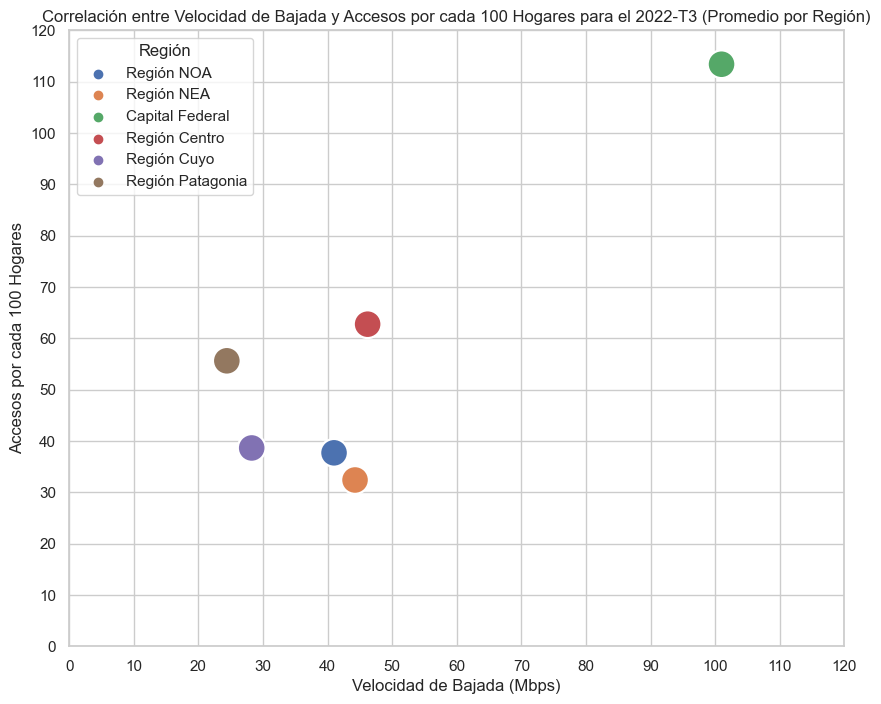

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar los datos para el periodo '22-T3'
df_filtered = df8[df8['Periodo'] == '22-T3']

# Calcular el promedio de accesos por cada 100 hogares para cada provincia en el periodo '22-T3'
df_accesos = df.groupby('Provincia')['internet_hogares_porcentual'].mean().reset_index()

# Unir los datos de velocidad de bajada y accesos por cada 100 hogares
df_combined = pd.merge(df_filtered, df_accesos, on='Provincia')

# Definir regiones y sus respectivas provincias
regiones = {
    'Región NOA': ['Santiago Del Estero', 'Tucumán', 'Catamarca', 'Jujuy', 'Salta'],
    'Región NEA': ['Chaco', 'Corrientes', 'Formosa', 'Misiones'],
    'Capital Federal': ['Capital Federal'],
    'Región Centro': ['Santa Fe', 'Córdoba', 'Entre Ríos', 'Buenos Aires', 'La Pampa'],
    'Región Cuyo': ['La Rioja', 'Mendoza', 'San Juan', 'San Luis'],
    'Región Patagonia': ['Neuquén', 'Río Negro', 'Chubut', 'Santa Cruz', 'Tierra Del Fuego']
}

# Calcular el promedio por región
df_region = pd.DataFrame(columns=['Región', 'Mbps (Media de bajada)', 'internet_hogares_porcentual'])
for region, provincias in regiones.items():
    df_region = df_region.append({
        'Región': region,
        'Mbps (Media de bajada)': df_combined[df_combined['Provincia'].isin(provincias)]['Mbps (Media de bajada)'].mean(),
        'internet_hogares_porcentual': df_combined[df_combined['Provincia'].isin(provincias)]['internet_hogares_porcentual'].mean()
    }, ignore_index=True)

# Crear el gráfico de correlación por región
sns.set(style='whitegrid')
plt.figure(figsize=(10, 8))
ax = sns.scatterplot(x='Mbps (Media de bajada)', y='internet_hogares_porcentual', hue='Región', data=df_region, s=400)

# Configurar colores intensos y únicos para cada región
colores = plt.cm.get_cmap('tab20', len(df_region['Región'].unique()))
ax.set_prop_cycle('color', colores.colors)

plt.title('Correlación entre Velocidad de Bajada y Accesos por cada 100 Hogares para el 2022-T3 (Promedio por Región)')
plt.xlabel('Velocidad de Bajada (Mbps)')
plt.ylabel('Accesos por cada 100 Hogares')

# Configurar tamaño del punto
plt.scatter([], [], s=400)

# Configurar los ejes con la misma escala y los ticks de 10 en 10 en el rango de 0 a 120
plt.xlim(0, 120)
plt.ylim(0, 120)
plt.xticks(range(0, 130, 10))
plt.yticks(range(0, 130, 10))

plt.show()


 Como hemos visto en anteriores análisis, excluyendo a Capital Federal, la región Centro termina estando a la vanguardia respecto a las demás regiones de Argentina en cuanto a la relación entre velocidad de bajada y penetración de Internet cada 100 hogares. A su vez, la región Patagonia posee mayor penetración que velocidad, mientras que para las regiones NOA y NEA existe un equilibrio entre estos indicadores. Por último la región Cuyo es la que posee peores índices de penetración y de velocidad. En todos los casos mencionados, surge la oportunidad de negocio es posible introducir mejoras sustanciales tanto en la velocidad de bajada como en la penetración.

In [31]:
df1 = pd.read_csv('Penetración_por_hogares_por_habitantes(ETL).csv')
df1.sort_values(['Año', 'Trimestre'], ascending=[True, True], inplace=True)
df1.head()

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
34,2014,1,49.55,15.05,14-T1
33,2014,2,49.86,15.16,14-T2
32,2014,3,50.67,15.43,14-T3
31,2014,4,50.50,15.39,14-T4
30,2015,1,51.36,15.68,15-T1


Un dato importante a tener en cuenta para un plan de negocios es el volumen de los ingresos generados, para ello se procede al análisis de la evolución de ingresos trimestrales en función del tiempo.
el campo ingresos puede representar un inconveniente debido a la variable no contemplada 'inflacion', ya que el rango de valores varia en 64 millones (aprox. 22,5 veces) entre el minimo y el maximo valor, por lo que para poder comparar iguales trimestres en diferentes años, o los ingresos en un periodo de tiempo dado, se ve la necesidad de 'normalizar' los ingresos, ya que de lo contrario generaria una incorrecta interpretacion de los datos. Se decide relativizar su valor para prescindir de datos extras de inflacion no confiables (estimada vs. real), empleando nuevo dataset obtenido de https://datos.gob.ar/series/api/series/?ids=168.1_T_CAMBIOR_D_0_0_26&limit=5000&end_date=2022-12-31&collapse=quarter&collapse_aggregation=avg&chartType=line para su respectiva conversion de moneda pesos a dolares (más estable). 

In [6]:
df3 = pd.read_csv('Ingresos_trimestrales_prestación_servicio_Internet_fijo(ETL).csv')
df3.sort_values(['Año', 'Trimestre'], ascending=[True, True], inplace=True)
df3.head()

,Año,Trimestre,Ingresos (miles de pesos),Periodo,relacion_USD_pesos,Ingresos_USD
34,2014,1,2984054,14-T1,7.96,374881155
33,2014,2,3270816,14-T2,8.06,405808436
32,2014,3,3478638,14-T3,8.35,416603353
31,2014,4,3950441,14-T4,8.52,463666784
30,2015,1,4876385,15-T1,8.69,561149021


C:\Users\David\AppData\Local\Temp\ipykernel_9428\263735463.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df3['Periodo'], rotation=90)


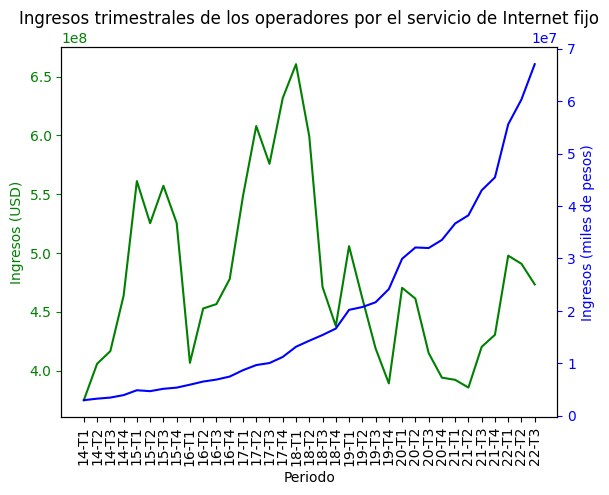

In [33]:
# Se crea la figura y los ejes
fig, ax1 = plt.subplots()

# Lineplot de 'Periodo' vs 'Ingresos_USD'
ax1.plot(df3['Periodo'], df3['Ingresos_USD'], color='g')
ax1.set_xlabel('Periodo')
ax1.set_ylabel('Ingresos (USD)', color='g')
ax1.tick_params('y', colors='g')

# Segundo eje para 'Ingresos (miles de pesos)'
ax2 = ax1.twinx()
ax2.plot(df3['Periodo'], df3['Ingresos (miles de pesos)'], color='b')
ax2.set_ylabel('Ingresos (miles de pesos)', color='b')
ax2.tick_params('y', colors='b')

# Se ajustan los espacios entre subplots para evitar solapamiento
plt.subplots_adjust(wspace=0.4)
ax1.set_xticklabels(df3['Periodo'], rotation=90)

# Se muestra el gráfico
plt.title('Ingresos trimestrales de los operadores por el servicio de Internet fijo')
plt.show()

El gráfico Ingresos en pesos y dólares en función de trimestres tiene dos escalas diferentes:
* a la derecha (en azul) hace alusión a ingresos expresados en miles de millones de pesos (el valor máximo se da en el período  22-T3 por un valor de $ 67.055.930.000 );
* a la izquierda (en verde) hace alusión a ingresos expresados en cientos de millones de dólares (el valor máximo se da en el período 18-T1 por un valor de US$ 660.554.667 ).

Como se había comentado previamente, al graficar los Ingresos trimestrales se puede observar claramente que los ingresos registrados en pesos, hay un crecimiento exponencial debido al fenómeno conjunto inflación - devaluación de la moneda, ya que el aumento de ingresos en los nueve años sería 2248 %, lo cual resulta inverosímil. Por otro lado, la conversión de los ingresos a dólares muestra una curva con fluctuaciones para distintos períodos (picos y valles), lo cual resulta razonable para este tipo de negocios, pero conservando el orden de magnitud tanto en sus valores máximos y mínimos (rango aprox. de 286 millones). En este sentido otras fuentes reportan ingresos similares: (https://es.statista.com/estadisticas/1147932/b2b-ingresos-telecomunicaciones-linea-fija-argentina/). Dichas fluctuaciones exacerbadas podrían explicarse en parte por el atraso cambiario que registra el país históricamente.


Siguiendo con este análisis, a continuación se muestra el pomedio anual de ingresos en dólares:

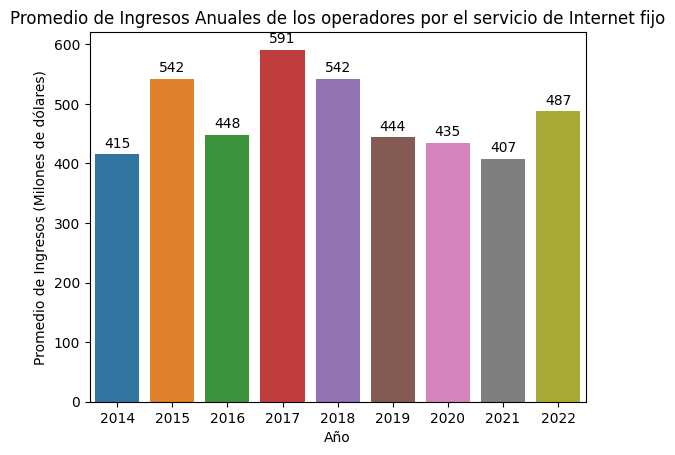

In [30]:
from matplotlib.ticker import FuncFormatter

# Calcular el promedio de ingresos por año
df3_avg_income = df3.groupby('Año')['Ingresos_USD'].mean().reset_index()

# Definir la función de formato para las etiquetas del eje y
def format_millions(value, _):
    return f'{round(value / 1000000)}'

# Graficar el promedio de ingresos por año
ax = sns.barplot(data=df3_avg_income, x='Año', y='Ingresos_USD')
plt.xlabel('Año')
plt.ylabel('Promedio de Ingresos (Milones de dólares)')
plt.title('Promedio de Ingresos Anuales de los operadores por el servicio de Internet fijo')

# Formatear las etiquetas del eje y
ax.yaxis.set_major_formatter(FuncFormatter(format_millions))

# Mostrar los valores absolutos encima de cada barra
for index, row in df3_avg_income.iterrows():
    ax.annotate(format_millions(row['Ingresos_USD'], None),
                xy=(row.name, row['Ingresos_USD']),
                xytext=(0, 5),
                textcoords='offset points',
                ha='center')

plt.show()


Los datos muestran un descenso en los ingresos promedio a partir del pico máximo en 2017 hasta 2021, teniendo en cuenta varios factores a considerar como el efecto "pandemia" y ya en el 2022 se percibe una recuperación de los ingresos respecto a los 3 años inmediantamente anteriores.